# Desicion Tree Regression

In [157]:
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor  
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

sys.path.insert(0, '../src')
import regression_functions_utils as rfu

In [158]:
def get_rand_rgb_color(col_numb):
    return [np.random.rand(col_numb)]

In [159]:
# Cars
# http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/
f = "/Users/tarajano/stud/data_analysis_stats_ml_mix/data/autos/imports-85_ready.csv"
dtf = pd.read_csv(f)
print(dtf.shape)

(205, 26)


####  Drop NA records

In [160]:
dtf = dtf.replace({'?': np.nan}).dropna()
print(dtf.shape)

(159, 26)


####  Define numeric and Categorical columns

In [161]:
num_cols = [ 
    'symboling', 'normalized_losses', 'num_of_doors', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
    'num_of_cylinders', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm',
    'city_mpg','highway_mpg', 'price'
]
cat_cols = [
    'make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style',
    'drive_wheels', 'engine_location', 'engine_type','fuel_system'
]

####  Convert Word to Number

In [162]:
from word2number import w2n

to_num = ['num_of_doors', 'num_of_cylinders']

for c in to_num:
    dtf[c] = [w2n.word_to_num(x) for x in dtf[c].values]

#### Keep numeric columns only

In [163]:
num_dtf = dtf[num_cols]
num_dtf.shape

(159, 18)

#### Cast types

In [164]:
num_dtf = num_dtf.astype(
    {'normalized_losses':'float32', 'bore':'float32', 'stroke':'float32',
     'horsepower': 'int32', 'peak_rpm': 'int32','price': 'float32'}
)

In [165]:
num_dtf.head()

,symboling,normalized_losses,num_of_doors,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,2,164.0,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.4,10.0,102,5500,24,30,13950.0
4,2,164.0,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.4,8.0,115,5500,18,22,17450.0
6,1,158.0,4,105.8,192.7,71.4,55.7,2844,5,136,3.19,3.4,8.5,110,5500,19,25,17710.0
8,1,158.0,4,105.8,192.7,71.4,55.9,3086,5,131,3.13,3.4,8.3,140,5500,17,20,23875.0
10,2,192.0,2,101.2,176.8,64.8,54.3,2395,4,108,3.50,2.8,8.8,101,5800,23,29,16430.0


#### Scale data

In [166]:
X = num_dtf.iloc[:,:-1]
y = num_dtf.iloc[:,-1]

X_scld = preprocessing.scale(X)
y_scld = preprocessing.scale(y)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float32, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


#### Split into Train & Test sets

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X_scld, y_scld, test_size=0.2)

#### Create regressor

In [169]:
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [171]:
y_hat = regressor.predict(X_test)

In [172]:
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("Coeff. Determination (R2): {}".format(regressor.score(X_train, y_train)))

# The mean squared error
print("Mean Squared Error: {}".format(mean_squared_error(y_test, y_hat)))

# Explained variance score: 1 is perfect prediction
print("Explained Variance Score: {}".format(r2_score(y_test, y_hat)))

Coeff. Determination (R2): 0.9995368431254634
Mean Squared Error: 0.10953840091992247
Explained Variance Score: 0.8654173433573465


#### Plot y_hat vs y_test to inspect regression results

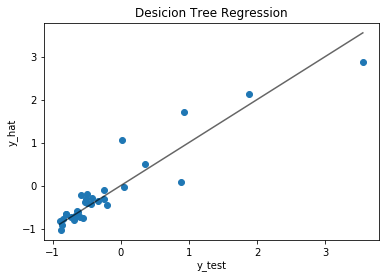

In [173]:
plt.scatter(y_test, y_hat)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', alpha=.6)
plt.xlabel('y_test')
plt.ylabel('y_hat')
plt.title('Desicion Tree Regression')
plt.show()

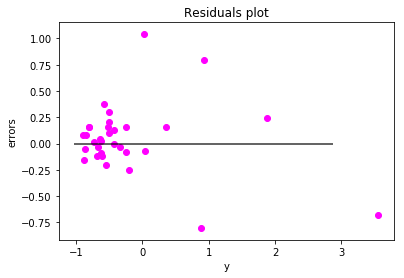

In [174]:
plt.scatter(y_test, (y_hat - y_test), color='magenta')
plt.hlines(0, min(y_hat), max(y_hat), color='black', alpha=.8)
plt.xlabel('y')
plt.ylabel('errors')
plt.title('Residuals plot')
plt.show()